# Online Payment Fraud Detection


One approach to tackle this problem is

**Transaction monitoring:** This involves using machine learning algorithms to analyze transactions in real-time, looking for patterns or anomalies that may indicate fraud. For example, a sudden increase in the number of transactions or a change in transaction patterns may indicate fraudulent activity.

Hence, inorder to identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments.

# About Dataset

There are 6362620 rows and 11 columns in our dataset.

* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction
* isFlaggedFraud: Flagged fraud transaction



In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Fraud.csv')
data.shape

(6362620, 11)

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


There are no null values in our dataset.

In [7]:
data.duplicated().sum()

0

There are no duplicate values in our dataset.

**Checking values for few columns**

In [8]:
data.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [9]:
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [10]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Exploratory Analysis and Visualization

# Univariate Analysis
Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

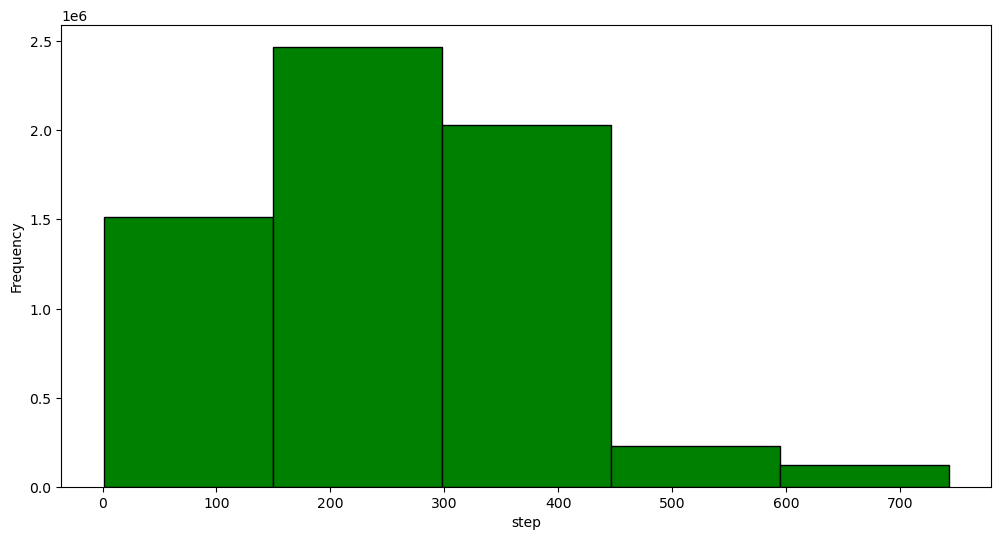

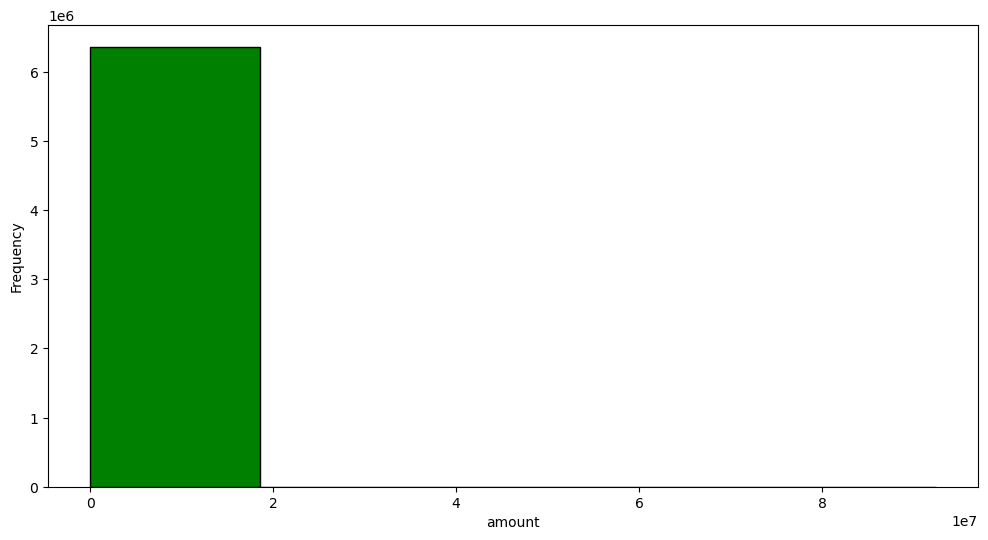

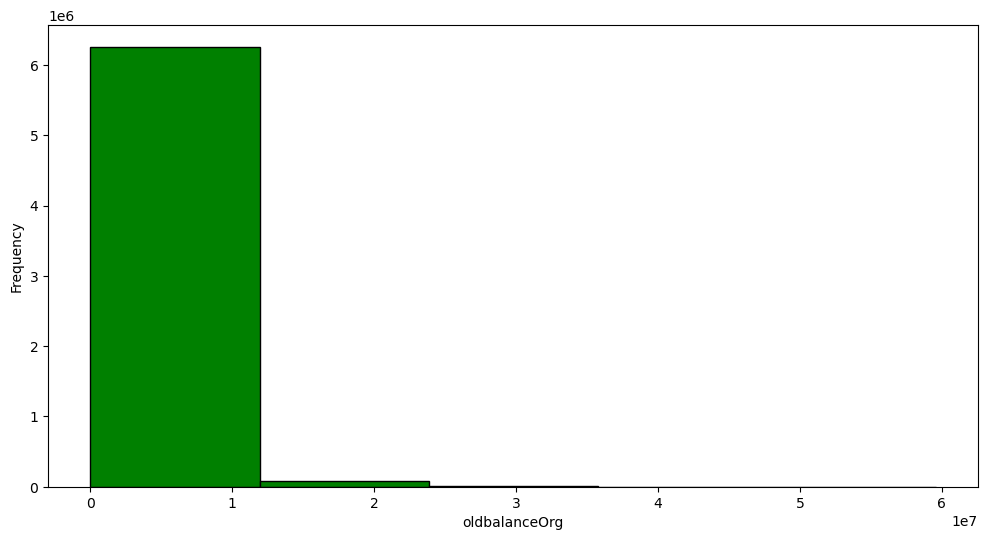

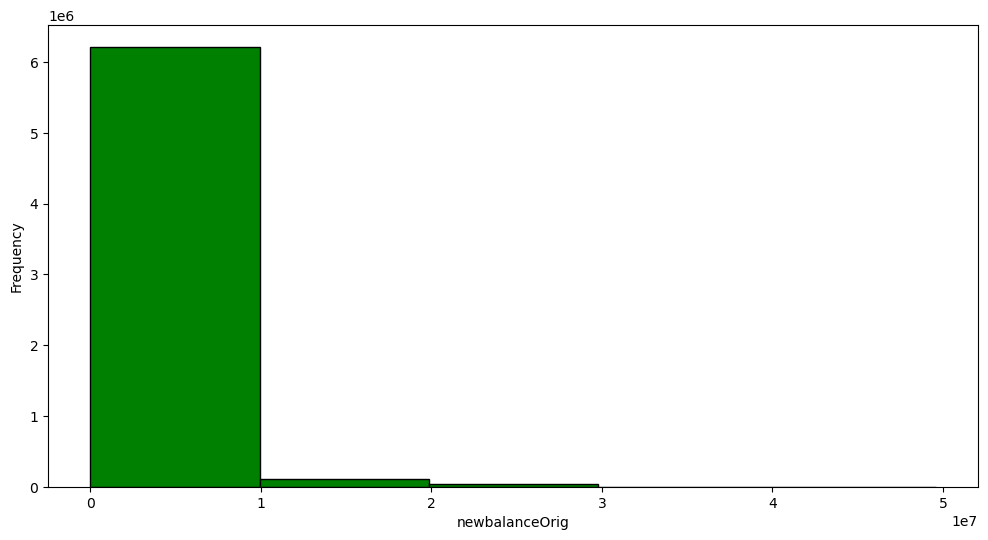

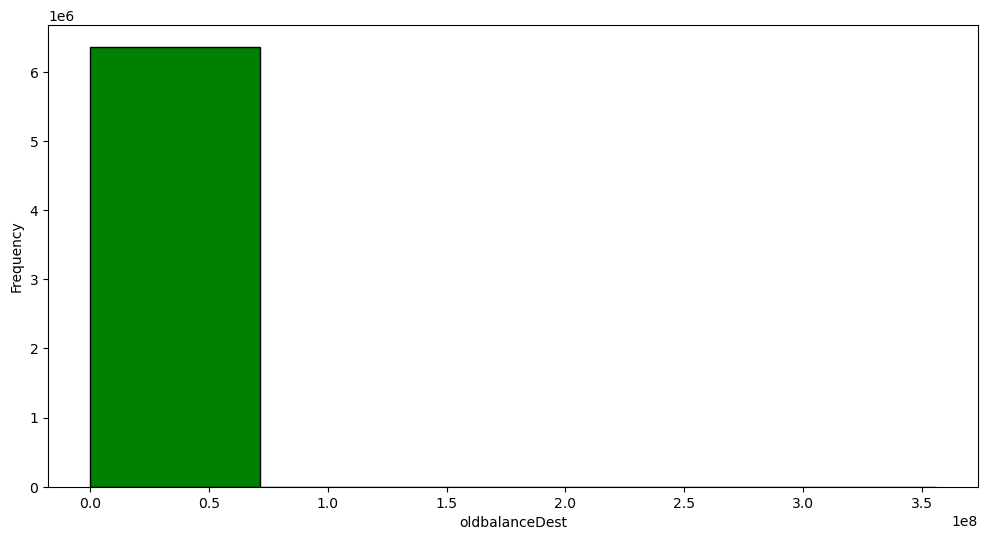

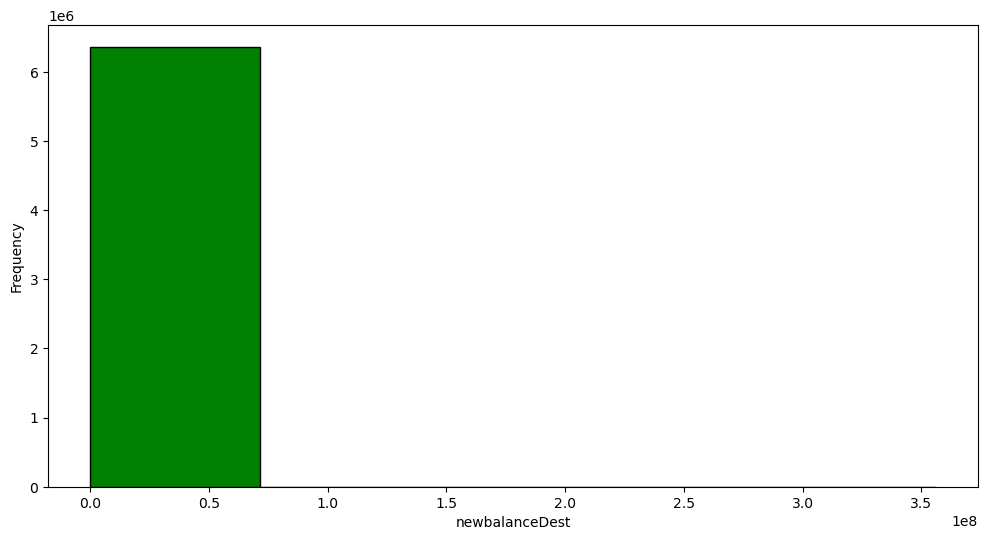

In [15]:
for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='green',edgecolor='black')
    plt.show()

We could see some outliers in the plots. So let's work on it.

We'll use Quantile-based Flooring and Capping for these columns.

**Capping** is replacing all higher side values exceeding a certain theoretical maximum or upper control limit (UCL) by the UCL value. Here we'll do 90th percentile for higher values.

**Flooring** is replacing all values falling below a certain theoretical minimum or lower control limit (UCL) by the LCL value. Here we'll do 90th percentile for higher values.

In [16]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [17]:
for i in feature:
    print(i)
    print(data[i].quantile(0.10))
    print(data[i].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




Now we'll remove the outlier.

In [18]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']


In [19]:
for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




Now we'll take a look at it after removing outliers.

In [20]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

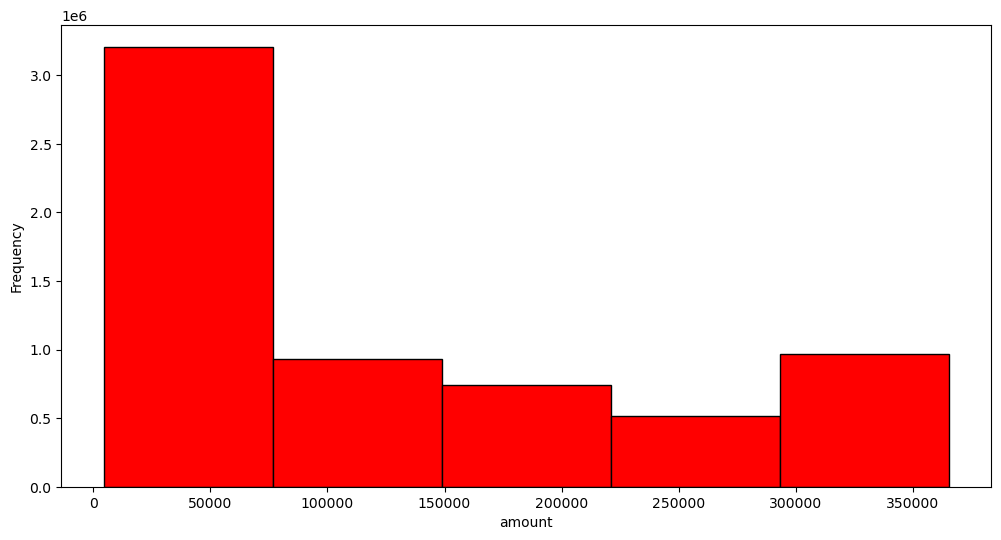

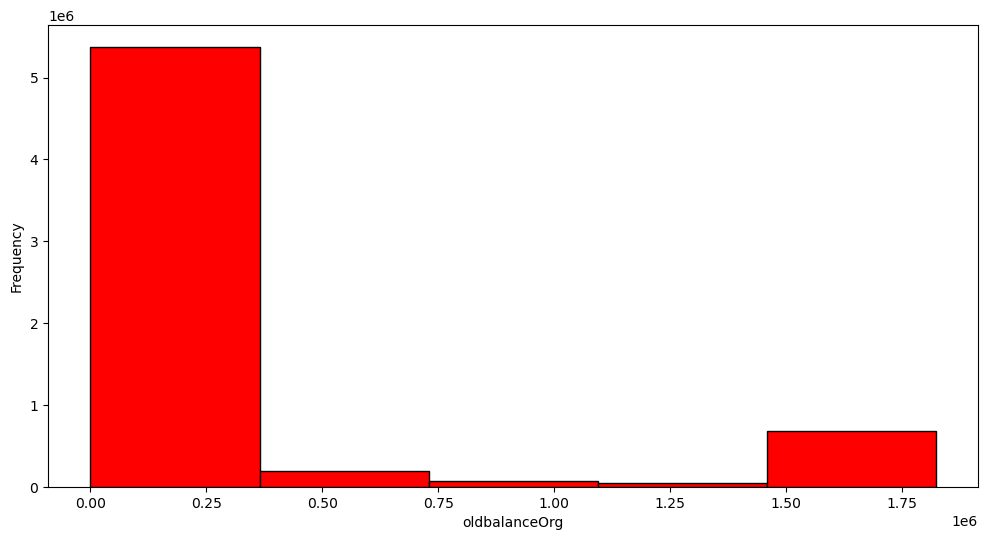

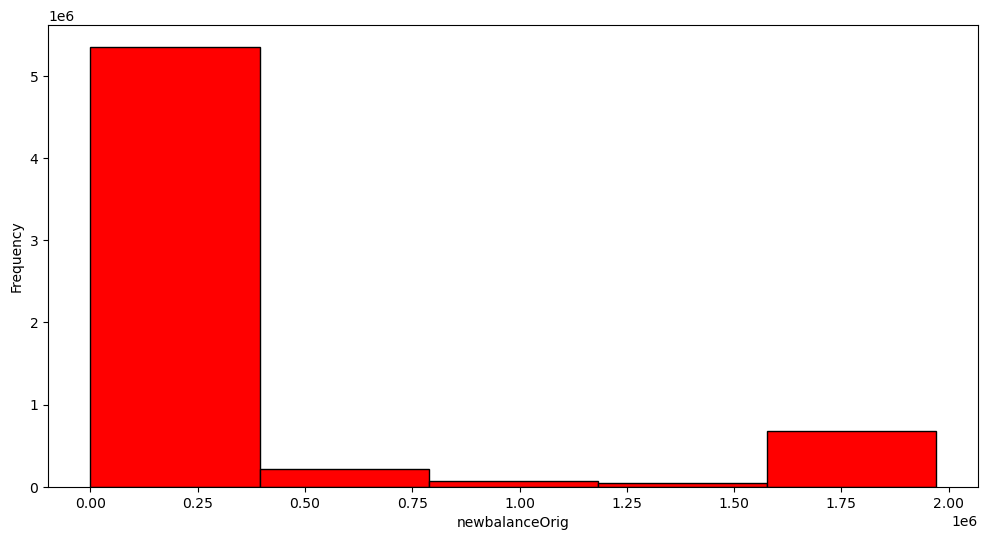

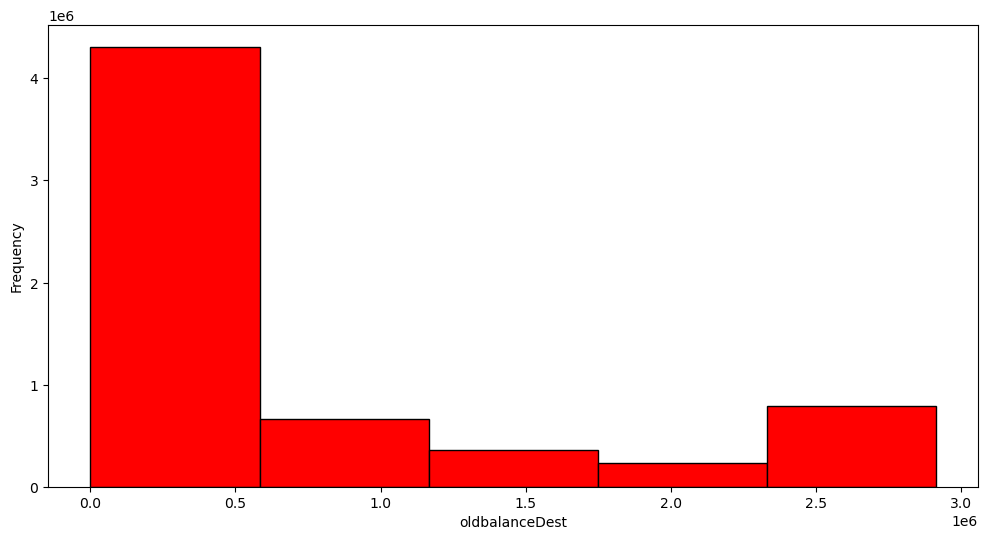

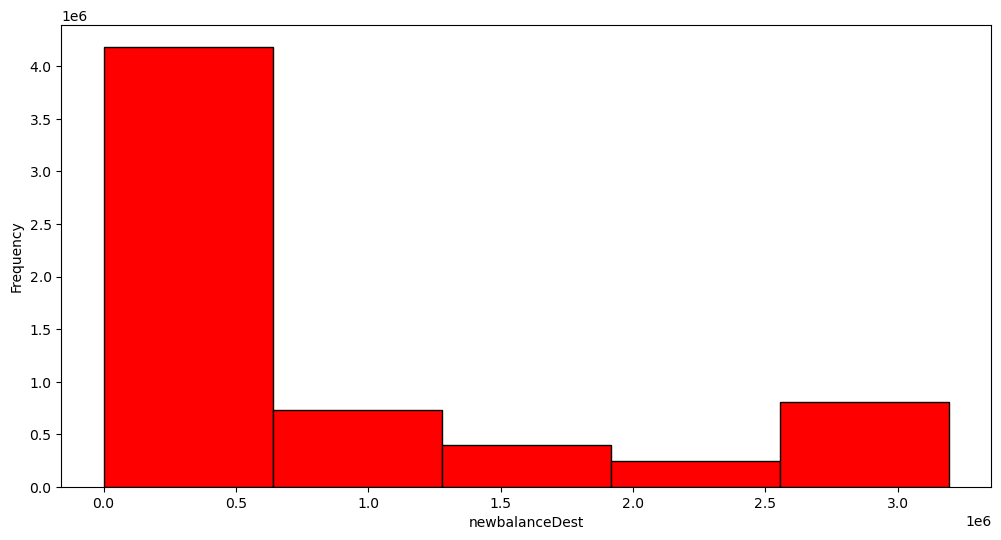

In [21]:
for i in feature:
    plt.xlabel(i)
    data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='red',edgecolor='black')
    plt.show()

After outlier treatment
* We have a maximum set of distribution between 150 to 400 of step
* Amount ranges between 0-35 lakhs with more values ranging between 0-75,000
* OldbalanceOrg ranges around 0-18 lakh with more frequency around 0-375,000
* NewbalanceOrig ranges around 0-19 lakh with more frequency around 0-375,000
* OldbalanceDest ranges around 0-29 lakh with common values around 0-625,000
* NewbalanceDest ranges around 0-35 lakh with common values around 0-625,000

**1. Let's take a closer look at 'type' column.**

In [22]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [23]:
payment = data.type.value_counts()
payment

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

* As we have already seen there are 5 types of payment happened. 
* More money has been transacted mostly through cash out followed by payment type.

Let's plot it using horizontal bar

<Axes: >

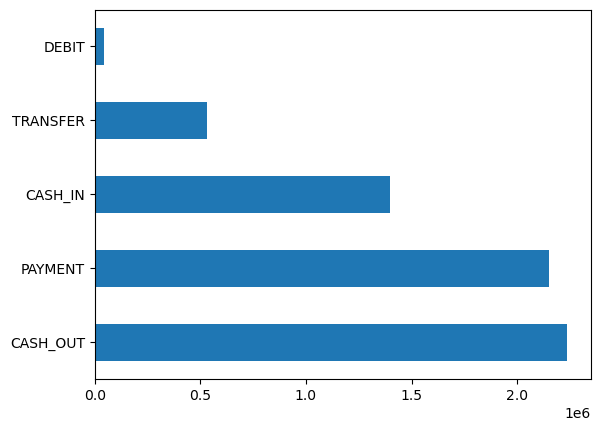

In [24]:
payment.plot(kind='barh')

<Axes: xlabel='type', ylabel='count'>

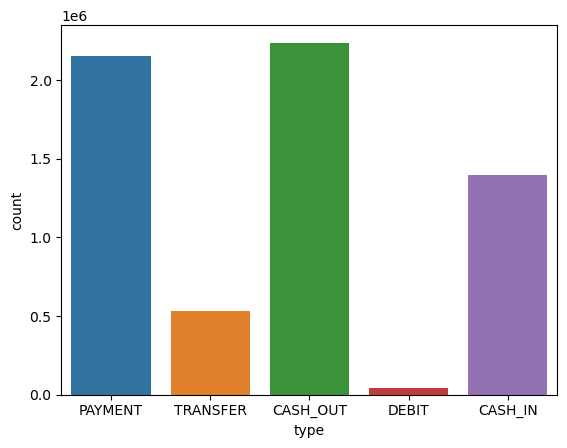

In [25]:
sns.countplot(x='type', data=data)

**Let's look at the relationship with type column with isfraud column**

In [26]:
cross_tab_result=pd.crosstab(index=data.type,columns=data.isFraud)
cross_tab_result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [27]:
cross_tab_result[1]

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: 1, dtype: int64

We can see that fraud occurred mostly while during transfer or cashout

<Axes: xlabel='type'>

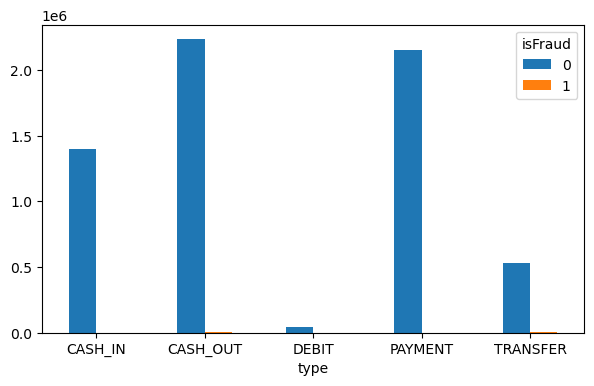

In [28]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)

<Axes: xlabel='type'>

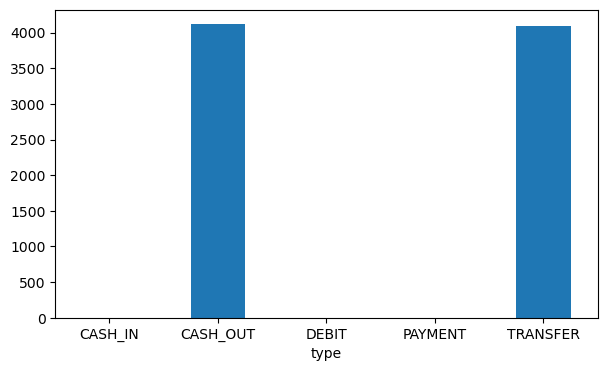

In [29]:
cross_tab_result[1].plot.bar(figsize=(7,4), rot=0)

(3500.0, 7000.0)

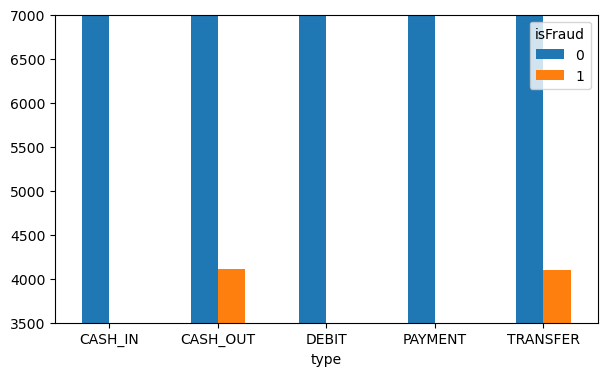

In [30]:
cross_tab_result.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

In [31]:
cross_tab_result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [32]:
cashout= (2233384 + 4116)
cashout_fraud= 4116/(cashout) * 100
cashout_fraud

0.18395530726256984

0.184 % denotes the percentage of fraud happened in total cashout mode type, which is very less%

In [33]:
transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud

0.7687991758442811

0.769 % denotes the percentage of fraud happened in total tranfer mode type, which is very also less%

**2. Let's take a closer look at amount column**

In [34]:
data.amount

0            9839.640
1            4501.300
2            4501.300
3            4501.300
4           11668.140
              ...    
6362615    339682.130
6362616    365423.309
6362617    365423.309
6362618    365423.309
6362619    365423.309
Name: amount, Length: 6362620, dtype: float64

Let's check the minimum and maximum range amount.

In [35]:
print('Minimum: ',data.amount.min())
print('Maximum: ',data.amount.max())

Minimum:  4501.3
Maximum:  365423.30900000007


<Axes: ylabel='amount'>

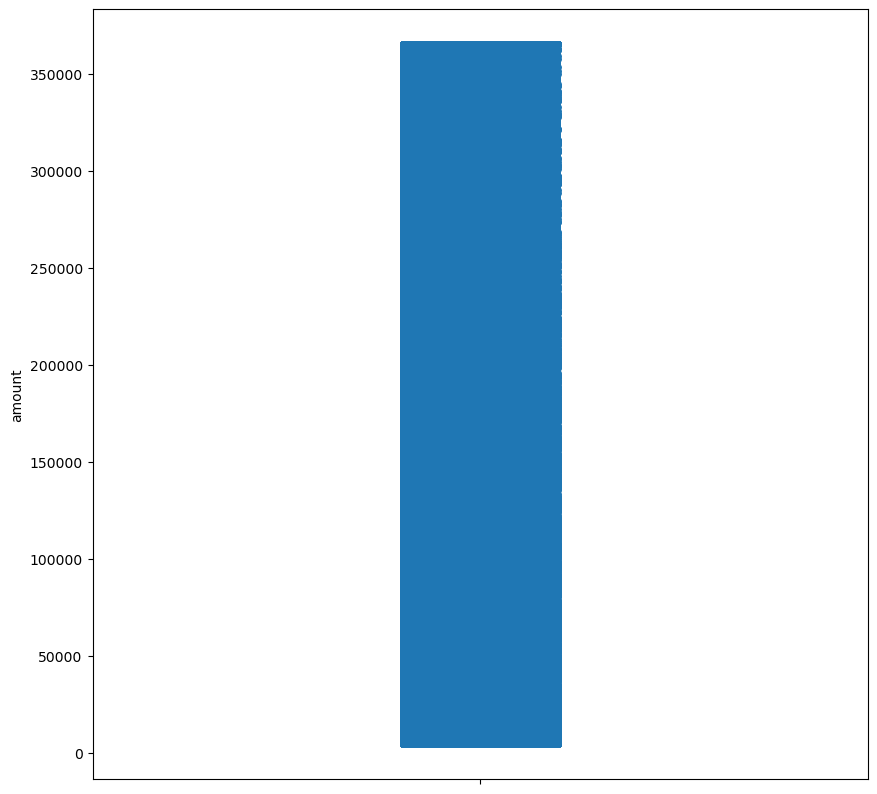

In [36]:
plt.figure(figsize=(10,10))
sns.stripplot(y=data.amount)

**Let's check the relationship of amount column with isFraud column**

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

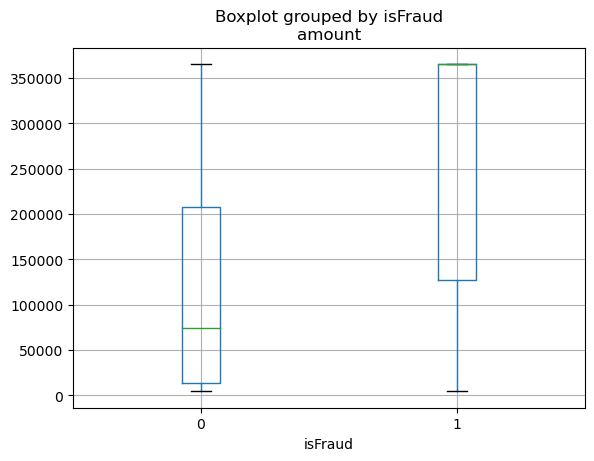

In [37]:
data.boxplot(column='amount', by='isFraud')

Fraud amount transaction range is between 1.3-3.6 lakh

**3. Let's take a closer look at isFlaggedFraud column**

In [38]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

From the total of 63 lakh records only 16 were assumed and flagged as fraud, which is actually a very low number. The actual fraud happend has a very higher value when compared to isFlaggedFraud column.

**Now let's look at how many values they assumed and flagged as fraud is actually correct**

In [39]:
flagged_fraud_records = data[(data.isFraud==1) & (data.isFlaggedFraud==1)]
flagged_fraud_records

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


In [40]:
flagged_fraud_records.shape

(16, 11)

This denotes that all the records which were flagged as fraud were correct.

**Now let's look at the percentage of records which were flagged as fraud to the total fraud that happened**

In [41]:
total_fraud= data[data.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [42]:
total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

In [43]:
flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of flagged fraud:  0.195
Percentage of incorrectly flagged fraud:  99.805


As we can see the percentage of records which are flagged as fraud is 0.195% which is very very less.

**4. Let's take a closer look at isFraud column**

In [44]:
total_transactions = data.shape[0]

fraud_transaction = data[data.isFraud==1].shape[0]

fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [45]:
print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [46]:
fraud_amount= data[data.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<Axes: ylabel='Frequency'>

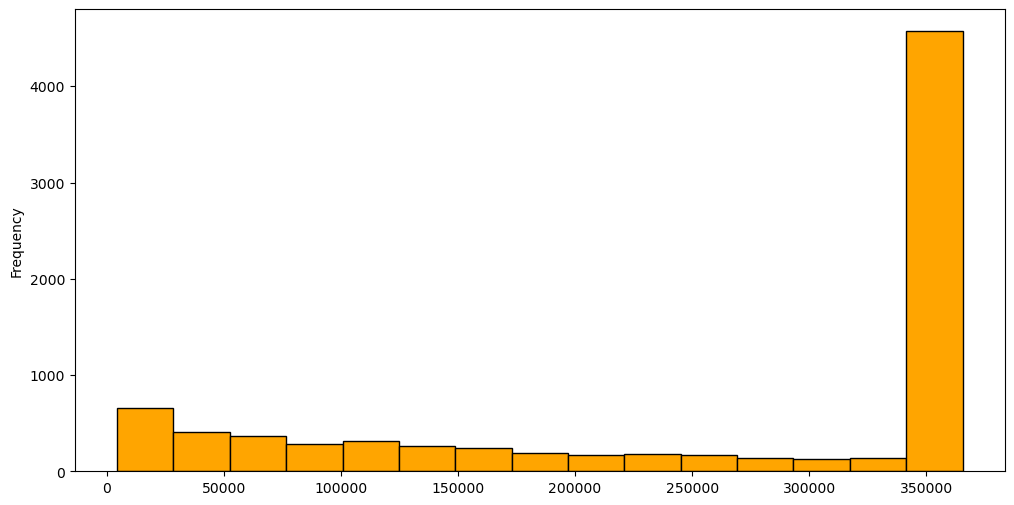

In [47]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

We've found that fraud amount transaction ranges between 1.3-3.6 lakh

Now, we can see that among them most occured were around 340,000-360,000 (3.4-3.6 lakh)

**5. Let's take a closer look at nameDest column**

In [48]:
fraudster= data.nameDest.value_counts()
fraudster

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

Since we have large number of unique values, we'll take only top 10 fraudster id name.

Taking the top 10 fraudster ids

In [49]:
fraudster[:10]

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

<Axes: >

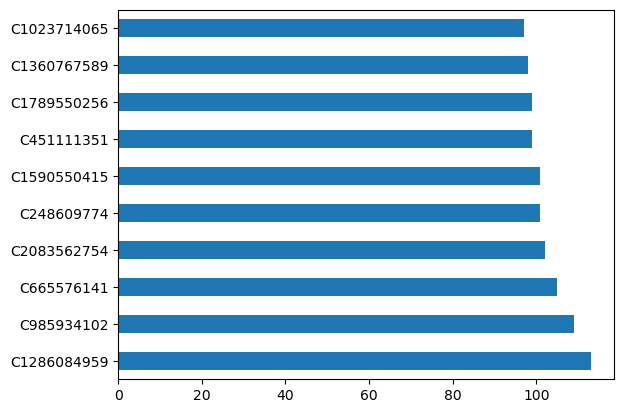

In [50]:
fraudster[:10].plot(kind='barh')

**6. Let's take a closer look at step column**

<Axes: xlabel='step', ylabel='Density'>

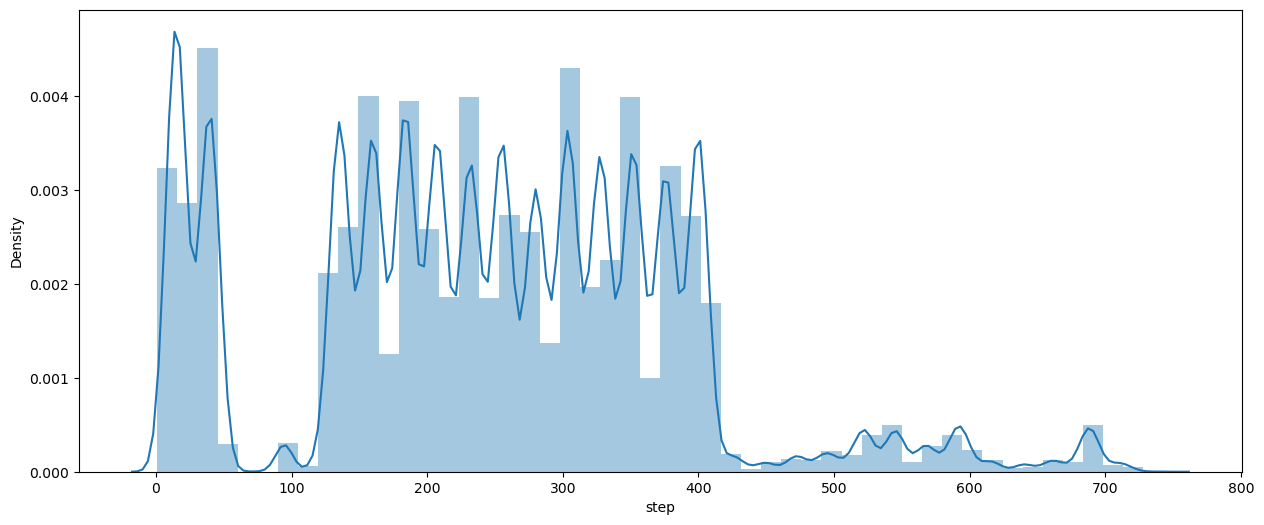

In [75]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

There is a maximum distribution of 100 to 400 of step

# Bivariate Analysis

C:\Users\acer\AppData\Local\Temp\ipykernel_18872\2181245761.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()# plot the heatmap


<Axes: >

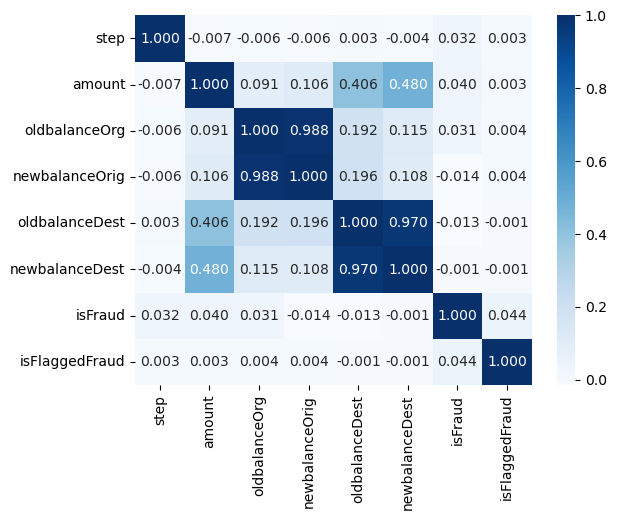

In [52]:
# calculate correlation matrix
corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

* There is a high correlation between newbalanceOrig and oldbalanceOrg.
* Also, between newbalanceDest and oldbalanceDest.
* Apart from that, we have a relatively high correlation between amount and newbalanceDest and amount with oldbalanceDest

# Data Preprocessing
Since the given dataset is highly imbalanced we need to balance the dataset before training our model.

In [53]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

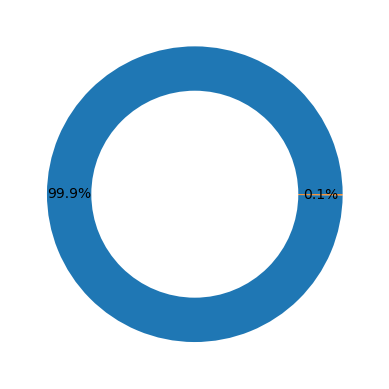

In [54]:
plt.pie(data.isFraud.value_counts(),
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [55]:
# class count
class_count_0, class_count_1 = data['isFraud'].value_counts()

# Separate class
class_0 = data[data['isFraud'] == 0]
class_1 = data[data['isFraud'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (6354407, 11)
class 1: (8213, 11)


# Under Sampling technique

total class of 1 and0: 0    8213
1    8213
Name: isFraud, dtype: int64


<Axes: title={'center': 'count (target)'}>

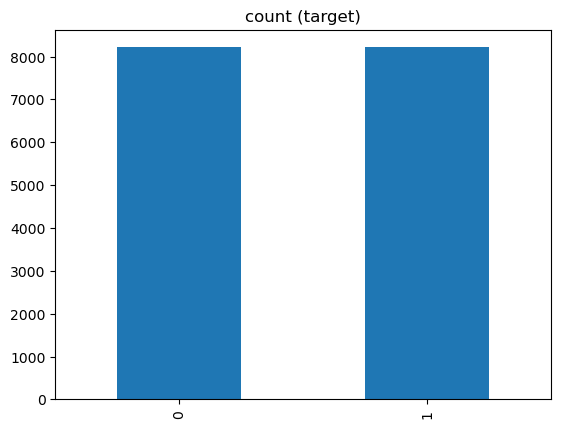

In [56]:
class_0_under = class_0.sample(class_count_1)

balanced_data = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",balanced_data['isFraud'].value_counts())# plot the count after under-sampeling
balanced_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [57]:
balanced_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3834762,282,CASH_OUT,4501.300,C459416481,114352.000,113513.93,C1226076600,2914266.669,3168088.130,0,0
3814792,281,CASH_OUT,182132.030,C288535126,37369.000,0.00,C1918779766,495005.930,677137.960,0,0
4649435,330,CASH_OUT,112802.240,C2118589209,49832.740,0.00,C354665921,255163.700,367965.940,0,0
2567940,206,PAYMENT,5447.570,C1555525167,20994.000,15546.43,M1479482711,0.000,0.000,0,0
5347762,375,CASH_IN,22545.600,C63118435,9069.000,31614.60,C539816992,2914266.669,3194869.671,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.00,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.00,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.00,C1365125890,68488.840,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.00,C2080388513,0.000,0.000,1,0


In [58]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 3834762 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [59]:
balanced_data.type.unique()

array(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [60]:
balanced_data["type"] = balanced_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [61]:
balanced_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [62]:
X = balanced_data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']].values
y = balanced_data['isFraud'].values

# Splitting the Dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the Dataset

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[2.26301370e+00 1.90912724e+05 4.93930725e+05 1.53482971e+05]


In [65]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

# Building the model and Fitting the Data

In [66]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [67]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [68]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(X_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)
    print("\n")

Training Model LR 
--------------
Training Accuracy: 0.8988584474885845
Testing Accuracy: 0.9080949482653682
Testing Confusion Matrix: 
[[1565   65]
 [ 237 1419]]
Recall Score :  0.9080949482653682
Precision Score :  0.9080949482653682
Testing F-1: 0.9080949482653683
Testing F-Beta: 0.9080949482653682
------------------------------


Training Model KNN 
--------------
Training Accuracy: 0.9891933028919331
Testing Accuracy: 0.987522824102252
Testing Confusion Matrix: 
[[1597   33]
 [   8 1648]]
Recall Score :  0.987522824102252
Precision Score :  0.987522824102252
Testing F-1: 0.987522824102252
Testing F-Beta: 0.987522824102252
------------------------------


Training Model DT 
--------------
Training Accuracy: 0.9983257229832573
Testing Accuracy: 0.9923919659160073
Testing Confusion Matrix: 
[[1618   12]
 [  13 1643]]
Recall Score :  0.9923919659160073
Precision Score :  0.9923919659160073
Testing F-1: 0.9923919659160073
Testing F-Beta: 0.9923919659160073
-----------------------------

As we see the XGBoost is the best algorithm with :
* accuracy : 99%
* F1 score : 99%

# Pick the best model

In [69]:
#Display the different parameter of the model
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [70]:
# Make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [71]:
# Evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.39%


# Prediction for new data

In [72]:
new_data = [[2,9839.64,170136.0,160296.36]]
if  model.predict(new_data)[0] == 0:
    print('not Fraud')
else: print('is Fraud')

is Fraud


# or

In [78]:
print('"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5')


# import ipywidgets as widgets
# from IPython.display import display
# import pandas as pd

# # Assuming you have a DataFrame 'df' with your features
# # Example: df = pd.read_csv('your_data.csv')

# # Create sliders for each column based on the range of values in the DataFrame
# feature1 = widgets.FloatSlider(min=balanced_data['type'].min(), max=balanced_data['type'].max(), step=1, value=balanced_data['type'].mean(), description='Type')
# feature2 = widgets.FloatSlider(min=balanced_data['amount'].min(), max=balanced_data['amount'].max(), step=1, value=balanced_data['amount'].mean(), description='Amount')
# feature3 = widgets.FloatSlider(min=balanced_data['oldbalanceOrg'].min(), max=balanced_data['oldbalanceOrg'].max(), step=1, value=balanced_data['oldbalanceOrg'].mean(), description='Old Balance Original')
# feature4 = widgets.FloatSlider(min=balanced_data['newbalanceOrig'].min(), max=balanced_data['newbalanceOrig'].max(), step=1, value=balanced_data['newbalanceOrig'].mean(), description='New Balance Original')

# # Display sliders
# display(feature1, feature2, feature3, feature4)

# # Button to trigger prediction
# predict_button = widgets.Button(description='Predict')

# # Function to make prediction based on slider values
# def on_button_click(b):
#     new_data = [[feature1.value, feature2.value, feature3.value, feature4.value]]
#     prediction = model.predict(new_data)[0]
#     if prediction == 0:
#         print('No fraudulent activity detected')
#     else:
#         print('Fraudulent activity detected')

# # Add button click event
# predict_button.on_click(on_button_click)

# # Display button
# display(predict_button)



import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Assuming you have a DataFrame 'df' with your features
# Example: balanced_data = pd.read_csv('your_data.csv')

# Create text input fields for each feature
feature1 = widgets.FloatText(value=0,step=1 ,description='Type:')
feature2 = widgets.FloatText(value=0,step=0.1, description='Amount:')
feature3 = widgets.FloatText(value=0,step=0.1, description='Old Balance Original:')
feature4 = widgets.FloatText(value=0, step=0.1,description='New Balance Original:')

# Display input fields
display(feature1, feature2, feature3, feature4)

# Button to trigger prediction
predict_button = widgets.Button(description='Predict')

# Function to make prediction based on input values
def on_button_click(b):
    new_data = [[feature1.value, feature2.value, feature3.value, feature4.value]]
    prediction = model.predict(new_data)[0]
    if prediction == 0:
        print('No fraudulent activity detected')
    else:
        print('Fraudulent activity detected')

# Add button click event
predict_button.on_click(on_button_click)

# Display button
display(predict_button)


"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5


FloatText(value=0.0, description='Type:', step=1.0)

FloatText(value=0.0, description='Amount:', step=0.1)

FloatText(value=0.0, description='Old Balance Original:', step=0.1)

FloatText(value=0.0, description='New Balance Original:', step=0.1)

Button(description='Predict', style=ButtonStyle())

Fraudulent activity detected
